In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import seaborn as sns
import tensorflow as tf

In [4]:
from wgomoku import (
    GomokuTools as gt, SampleDataHelper, GomokuBoard, Heuristics,
    PolicyModel, display_sample, new_policy_dataset,
    analyse_and_recommend)

In [5]:
N=19

In [6]:
model = PolicyModel(board_size=N, n_blocks=10, 
                    n_layers=3, n_filters=32, 
                    activation='relu')

In [7]:
latest = tf.train.latest_checkpoint("./models/PolicyNet_1.0/")
print(latest)
new_model = PolicyModel(board_size=19, n_blocks=10, 
                    n_layers=3, n_filters=32, 
                    activation='relu')
new_model.load_weights(latest)
model = new_model

./models/PolicyNet_1.0/cp-0006.ckpt


In [8]:
sdh = SampleDataHelper(N, representation='NxNx1B')

In [9]:
game="j10i9i10k10j11j9k12h9k9l11m12h10h7h12h11j12g9g11f12k7j8i7l13m14l8m7k14j15o10n11k8i8m8n8j13i12k13m13k15k16k11"
game="j10i9i10k10j11j9k12h9k9l11m12h10h7h12h11j12g9g11f12k7j8i7l13m14l8m7k14j15o10n11k8i8m8n8j13i12k13"
stones = gt.string_to_stones(game)

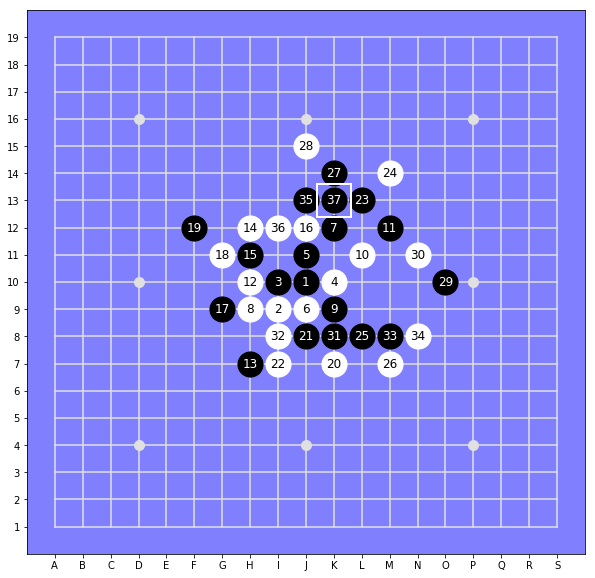

In [10]:
board = GomokuBoard(N=19, heuristics=Heuristics(kappa=3.0), stones=stones, disp_width=10)
board.display()

### Policy at work!!


In [11]:
smpnp = sdh.sample_from_string(game)
pi = new_model.dist(smpnp.reshape(1, 21, 21, 2)).numpy()
dist, greedy = analyse_and_recommend(smpnp, pi, 10)

Somewhat greedy selection of moves: Choose the 10 best option for further consideration

In [12]:
greedy

[(array([11, 16]), 0.0025382875464856625),
 (array([11, 15]), 0.018709048628807068),
 (array([12, 15]), 0.003123067319393158),
 (array([ 8, 13]), 0.01774357631802559),
 (array([ 9, 13]), 0.018709048628807068),
 (array([13, 13]), 0.018709048628807068),
 (array([14, 13]), 0.0063715544529259205),
 (array([ 6, 11]), 0.0025365352630615234),
 (array([11, 11]), 0.018709048628807068),
 (array([ 6, 10]), 0.0032520939130336046)]

Five of the moves are particularly likely - and hopefully strong:

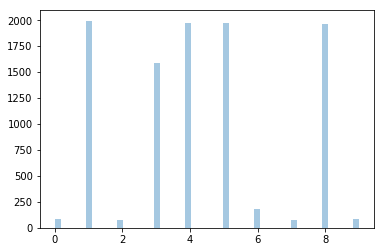

In [13]:
import random 
greedy_bias = 200 # higher values prefer expoitation over exploration 
cho = [g[0] for g in greedy]
weights = [greedy_bias*g[1] for g in greedy]
weights = np.exp(weights)/np.sum(np.exp(weights))
samples = np.random.choice(range(10), p=weights, size=10000)
sns.distplot(samples, kde=False)

The heatmap shows us why that is the case.

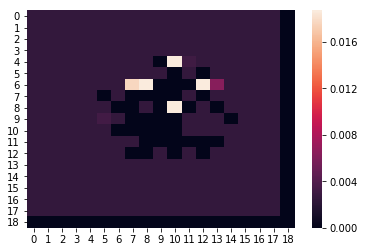

In [14]:
distr, greedy = analyse_and_recommend(smpnp, pi, 10)
sns.heatmap(distr)

---
# Draw a sample episode

In [15]:
template = sdh.template()

In [16]:
game = template.copy()
game[10][10][0] = -1

In [17]:
display_sample(game)

[[ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0

In [18]:
pi = model.dist(np.reshape(game, [1,21,21,2]))

In [19]:
n_choices = 10
greedy_bias = 200

In [20]:
distr, choice = analyse_and_recommend(game, pi, n_choices)
choice

[(array([ 7, 13]), 0.016822708770632744),
 (array([ 8, 12]), 0.016822844743728638),
 (array([10, 12]), 0.016822844743728638),
 (array([10, 11]), 0.016820654273033142),
 (array([11, 11]), 0.016822844743728638),
 (array([ 7, 10]), 0.01502069178968668),
 (array([ 8, 10]), 0.01682284101843834),
 (array([ 9, 10]), 0.01682284288108349),
 (array([11, 10]), 0.015665285289287567),
 (array([9, 9]), 0.016822844743728638)]

In [21]:
weights = [greedy_bias*g[1] for g in greedy]
weights = np.exp(weights)/np.sum(np.exp(weights))
draw = np.squeeze(np.random.choice(range(n_choices), p=weights, size=1))
move = choice[draw][0]
move

array([ 8, 12])

In [22]:
r, c = gt.b2m(move, N)+[1,1]

In [23]:
game[r][c][0] = 1
game = 2 * template - game

In [24]:
display_sample(game)

[[ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0

In [25]:
def do_one_move(game, policy, n_choice, greedy_bias):
    game = game.copy()
    pi = model.dist(np.reshape(game, [1,21,21,2]))
    _, choice = analyse_and_recommend(game, pi, n_choices)
    weights = [greedy_bias*g[1] for g in choice]
    weights = np.exp(weights)/np.sum(np.exp(weights))
    draw = np.squeeze(np.random.choice(range(n_choices), p=weights, size=1))
    move = choice[draw][0]
    r, c = gt.b2m(move, N)+[1,1]
    game[r][c][0] = 1
    return 2 * template - game, move

In [26]:
game, _ = do_one_move(game, model, n_choices, greedy_bias)
display_sample(game)

[[ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0

In [27]:
class TerminalDetector():
    """
    Convnet to detect lines of five. Works for NxNx1B representation only.
    """
    def __init__(self, N):
        self.N = N
        hor=np.zeros([5,5], dtype=np.float16)
        hor[2]=1.
        diag=np.eye(5, dtype=np.float16)
        filters = np.array([hor, hor.T, diag, diag[::-1]])
        kernel_init = tf.constant_initializer(np.rollaxis(filters, 0, 3))
        bias_init = tf.constant_initializer(-4.0)

        self.conv = tf.keras.layers.Conv2D(
            bias_initializer=bias_init, kernel_size=5,
            activation='relu', filters=4, padding='same', 
            kernel_initializer=kernel_init)
        self.pool = tf.keras.layers.MaxPool2D(pool_size=self.N, strides=1)
        
    def call(self, game):
        both = np.rollaxis(game, 2, 0)[0]
        to_move = (both+1) // 2
        other = (1-both) // 2
        both_again = np.stack([to_move, other], axis=0)
        both_again = np.reshape(both_again, [2, 21, 21, 1])        
        both_again = tf.cast(both_again, dtype=tf.float32)
        res = self.pool(self.conv(both_again))
        return np.squeeze(tf.reduce_max(res, axis=-1).numpy())


In [28]:
both = np.rollaxis(game, 2, 0)[0]
to_move = (both+1) // 2
other = (1-both) // 2
both_again = np.stack([to_move, other], axis=0)
both_again = np.reshape(both_again, [2, 21, 21, 1])

In [29]:
both_again.shape

(2, 21, 21, 1)

In [39]:
from wgomoku import TerminalDetector

In [30]:
detector = TerminalDetector(N=21)

In [31]:
limit = 50
move_count = 0
terminated = False
game = template.copy()
game[10][10][0] = -1
traj = []
while move_count < limit and not terminated:
    game, move = do_one_move(game, model, n_choices, 300)
    traj.append(move)
    terminated = (detector.call(game) != 0).any()
    move_count += 1
terminated

True

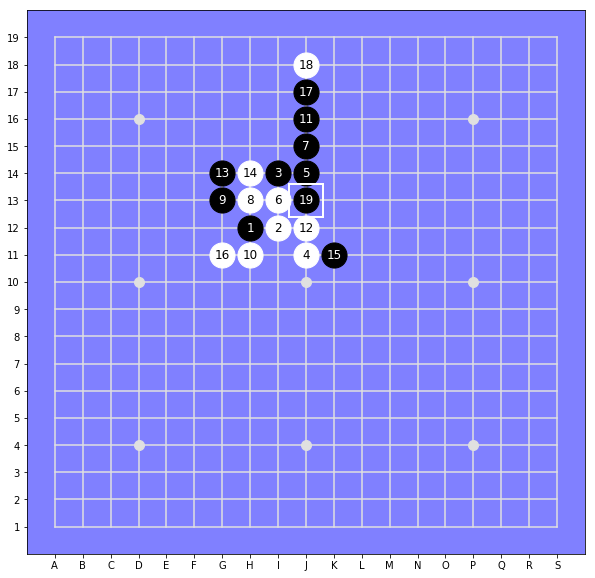

In [32]:
board = GomokuBoard(N=19, heuristics=Heuristics(kappa=3.0), stones=traj, disp_width=10)
board.display()

In [33]:
class SelfPlay:
    def __init__(self, policy, board_size):
        self.td = TerminalDetector(board_size+2)
        self.pi = policy
        sdh = SampleDataHelper(N, representation='NxNx1B')
        self.sdh = sdh
        self.template = sdh.template()
        
        
    def create_episode(self, limit, n_choices, greedy_bias):
        move_count = 0
        terminated = False
        game = self.template.copy()
        game[10][10][0] = -1
        traj = []
        while move_count < limit and not terminated:
            game, move = self.do_one_move(game, model, n_choices, 300)
            traj.append(move)
            terminated = (self.td.call(game) != 0).any()
            move_count += 1
        return game, traj, terminated

    
    def do_one_move(self, game, policy, n_choices, greedy_bias):
        game = game.copy()
        pi = model.dist(np.reshape(game, [1,21,21,2]))
        _, choice = analyse_and_recommend(game, pi, n_choices)
        weights = [greedy_bias*g[1] for g in choice]
        weights = np.exp(weights)/np.sum(np.exp(weights))
        draw = np.squeeze(np.random.choice(range(n_choices), p=weights, size=1))
        move = choice[draw][0]
        r, c = gt.b2m(move, N)+[1,1]
        game[r][c][0] = 1
        return 2 * self.template - game, move        
        

In [34]:
sp = SelfPlay(model, 19)

In [35]:
game = sdh.template()
game[10][10][0] = -1        

In [36]:
game, move = sp.do_one_move(game, model, 10, 200)
move

array([9, 9])

In [37]:
game, moves, terminated = sp.create_episode(50, 10, 200)

In [38]:
display_sample(game)
terminated, moves

[[ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  1 -1  1  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  1 -1  1  0 -1  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0 -1  1  1  1  1 -1  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  1  1 -1 -1  0  1 -1  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0 -1  0  1  1 -1 -1  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  1 -1 -1  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 2  0  0

(True,
 [array([10, 12]),
  array([11, 13]),
  array([ 9, 12]),
  array([11, 10]),
  array([ 9, 10]),
  array([ 8, 12]),
  array([ 7, 13]),
  array([ 7, 11]),
  array([ 9, 13]),
  array([ 8, 13]),
  array([ 8, 14]),
  array([11, 11]),
  array([ 5, 11]),
  array([ 8, 11]),
  array([11, 12]),
  array([8, 9]),
  array([12, 12]),
  array([13, 12]),
  array([10, 11]),
  array([9, 9]),
  array([10, 14]),
  array([ 9, 14]),
  array([ 8, 10]),
  array([7, 7]),
  array([7, 9]),
  array([10, 15]),
  array([8, 8]),
  array([ 6, 10]),
  array([ 6, 11]),
  array([11, 16]),
  array([ 9, 15]),
  array([12, 17])])